In [1]:
%matplotlib inline

import math
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
status = pd.read_csv("Set de datos TP1/status.csv",iterator=True,chunksize=100000)
station = pd.read_csv("Set de datos TP1/station.csv")
weather = pd.read_csv("Set de datos TP1/weather.csv")
trip = pd.read_csv("Set de datos TP1/trip.csv")

In [3]:
#Status es muy grande como para procesarlo todo junto, tomamos solamente una parte para ver qué tipo de datos tiene
status_partial = status.get_chunk()

In [4]:
#Para cada estación tenemos, minuto a minuto, la información de cuántas bicicletas disponibles hay.
status_partial

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01
3,2,2,25,2013/08/29 12:09:01
4,2,2,25,2013/08/29 12:10:01
5,2,2,25,2013/08/29 12:11:01
6,2,2,25,2013/08/29 12:12:01
7,2,2,25,2013/08/29 12:13:01
8,2,2,25,2013/08/29 12:15:01
9,2,2,25,2013/08/29 12:16:02


In [5]:
#Verificamos los tipos de datos
status_partial.dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

In [6]:
#Vemos qué forma tiene station. Podemos ver que cada registro nos muestra información sobre cada una de las 
#estaciones del circuito.
station

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [7]:
#Verificación de los tipos
station.dtypes

id                     int64
name                  object
lat                  float64
long                 float64
dock_count             int64
city                  object
installation_date     object
dtype: object

In [8]:
#Weather nos da información de las condiciones meteorológicas día a día. La columna zip code representa a qué
#costa de san francisco pertenece la información. Es por eso que los se repite el mismo día varias veces, cada
#uno de esos días repetidos pertenece a una costa diferente
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107
6,9/4/2013,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,10.0,10.0,29.0,19.0,35.0,0,4.0,NaN,269.0,94107
7,9/5/2013,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,10.0,10.0,31.0,21.0,37.0,0,3.0,NaN,270.0,94107
8,9/6/2013,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,10.0,10.0,24.0,8.0,28.0,0,0.0,NaN,287.0,94107
9,9/7/2013,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,10.0,10.0,21.0,8.0,25.0,0,1.0,NaN,305.0,94107


In [9]:
#Verificamos los tipos, vemos que el campo precipitation_inches es un object. Sería más apropiado que fuera
#float 64. También voy  convertir la fecha a un formato apropiado.
weather.dtypes

date                               object
max_temperature_f                 float64
mean_temperature_f                float64
min_temperature_f                 float64
max_dew_point_f                   float64
mean_dew_point_f                  float64
min_dew_point_f                   float64
max_humidity                      float64
mean_humidity                     float64
min_humidity                      float64
max_sea_level_pressure_inches     float64
mean_sea_level_pressure_inches    float64
min_sea_level_pressure_inches     float64
max_visibility_miles              float64
mean_visibility_miles             float64
min_visibility_miles              float64
max_wind_Speed_mph                float64
mean_wind_speed_mph               float64
max_gust_speed_mph                float64
precipitation_inches               object
cloud_cover                       float64
events                             object
wind_dir_degrees                  float64
zip_code                          

In [10]:
#Ahora sí, está corregido
weather.precipitation_inches = pd.to_numeric(weather.precipitation_inches, errors = 'coerce')
weather.date = pd.to_datetime(weather.date, errors = 'coerce')
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                     float64
cloud_cover         

In [11]:
#En trip tenemos información sobre cada uno de los viajes que se realizaron durante el período analizado
trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


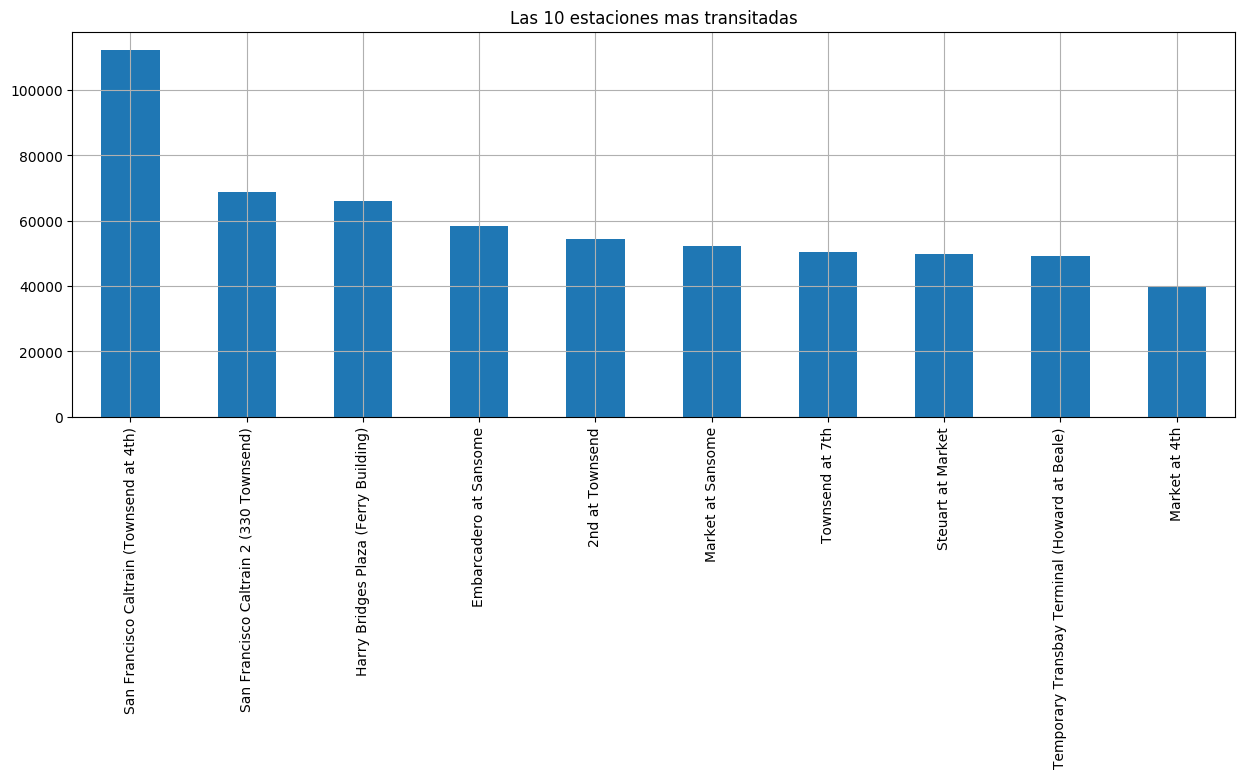

In [12]:
#Comenzamos haciendo un analisis de las estaciones, veamos cuáles son las diez más transitadas

most_popular_start_stations = trip.start_station_name.value_counts().sort_values(ascending = False)
most_popular_end_stations = trip.end_station_name.value_counts().sort_values(ascending = False)
most_popular_stations = (most_popular_start_stations + most_popular_end_stations).sort_values(ascending = False)
most_popular_stations[:10].plot.bar(title = 'Las 10 estaciones mas transitadas', grid = True)


In [92]:
#Veamos, sobre la estación más popular, cómo afectan las temperaturas al tránsito de ciclistas
#a=pd.core.frame.DataFrame
#df = pd.core.frame.DataFrame({'Trafico_total' : pd.Series(most_popular_stations) })
#df

,Trafico_total
San Francisco Caltrain (Townsend at 4th),112271
San Francisco Caltrain 2 (330 Townsend),68859
Harry Bridges Plaza (Ferry Building),66127
Embarcadero at Sansome,58509
2nd at Townsend,54366
Market at Sansome,52205
Townsend at 7th,50361
Steuart at Market,49863
Temporary Transbay Terminal (Howard at Beale),49169
Market at 4th,40080


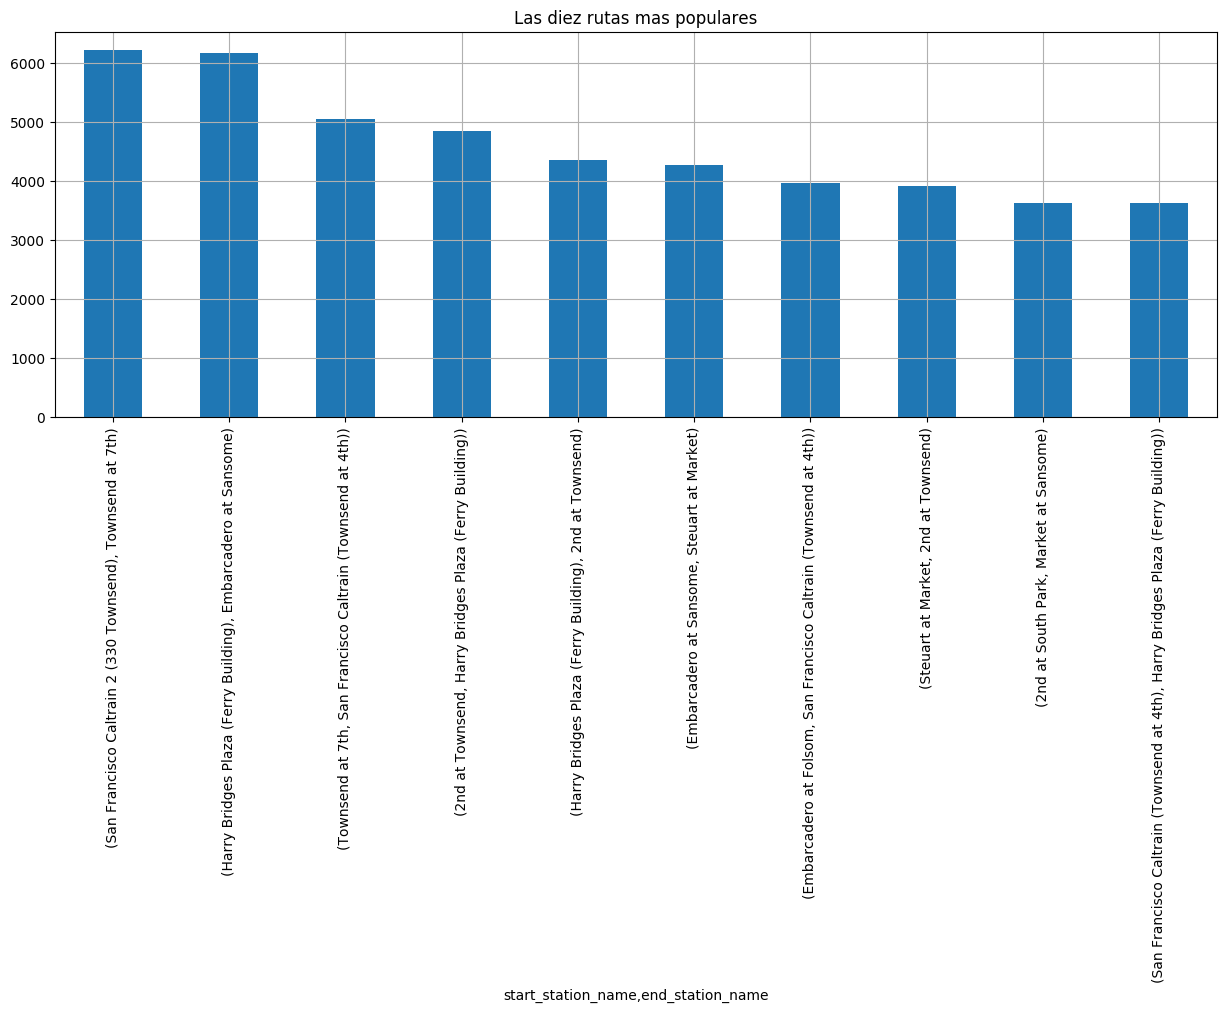

In [13]:
#Las diez rutas más populares para los ciclistas
most_popular_routes = trip.groupby('start_station_name').end_station_name.value_counts().sort_values(ascending=False)
most_popular_routes[:10].plot('bar', title = 'Las diez rutas mas populares',grid=True)

In [62]:
#Cuántos viajes se hicieron en cada uno de los días del set de datos?
trip.start_date = pd.to_datetime(trip.start_date, errors = 'coerce')
dias_viajes = trip.loc[:,['start_date']]
dias_viajes.start_date = dias_viajes.start_date.dt.date
dias_viajes['viajes_hechos'] = 1
cantidad_viajes_por_dia = dias_viajes.groupby('start_date').aggregate(sum)
cantidad_viajes_por_dia

,viajes_hechos
start_date,
2013-08-29,748
2013-08-30,714
2013-08-31,640
2013-09-01,706
2013-09-02,661
2013-09-03,597
2013-09-04,606
2013-09-05,677
2013-09-06,814


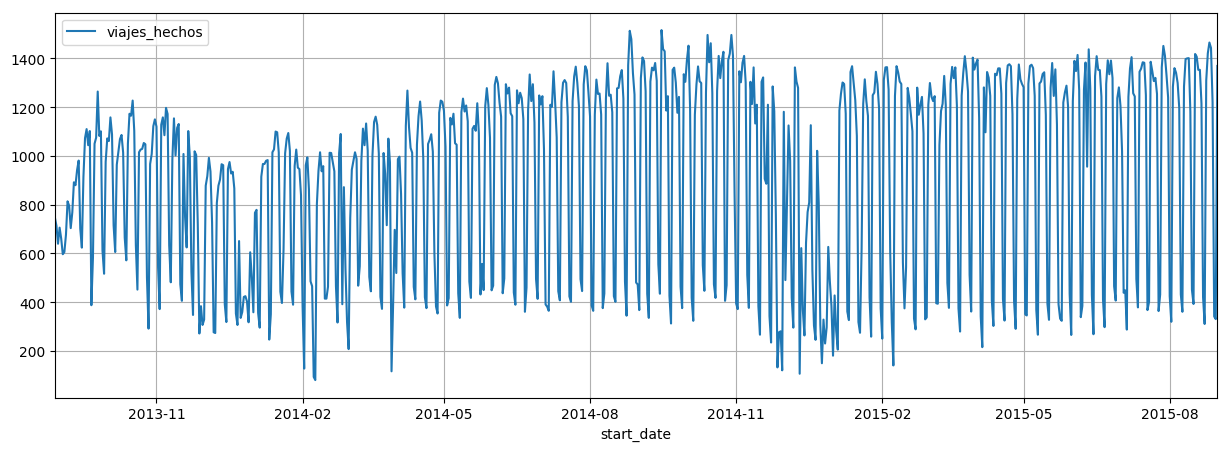

In [63]:
#Podemos ver en este gráfico cómo la cantidad de viajes cae drásticamente en las cercanías del mes de febrero, lo que coincide
#con la época invernal en San Fancisco.
cantidad_viajes_por_dia.plot.line(grid=True)

In [64]:
#Vamos a separar los datos meteorológicos de cada zip_code, para analizar los casos por separado

weather_94107 = weather[weather.zip_code == 94107]
weather_95113 = weather[weather.zip_code == 95113]
weather_94301 = weather[weather.zip_code == 94301]
weather_94063 = weather[weather.zip_code == 94063]
weather_94041 = weather[weather.zip_code == 94041]
clima_fecha_94107 = weather_94107.groupby('date').aggregate(sum) #El sum no hace nada, es nada más para tener las fechas de índice
clima_fecha_95113 = weather_95113.groupby('date').aggregate(sum)
clima_fecha_94301 = weather_94301.groupby('date').aggregate(sum)
clima_fecha_94063 = weather_94063.groupby('date').aggregate(sum)
clima_fecha_94041 = weather_94041.groupby('date').aggregate(sum)


In [65]:
#Ahora tengo, para cada dia del dataset, la cantidad de viajes que se hicieron y la temperatura media de ese dia
viajes_y_temperatura_por_dia_en_94107 = pd.concat([cantidad_viajes_por_dia, clima_fecha_94107.mean_temperature_f], axis=1)
viajes_y_temperatura_por_dia_en_94107


,viajes_hechos,mean_temperature_f
2013-08-29,748,68.0
2013-08-30,714,69.0
2013-08-31,640,64.0
2013-09-01,706,66.0
2013-09-02,661,69.0
2013-09-03,597,67.0
2013-09-04,606,68.0
2013-09-05,677,66.0
2013-09-06,814,71.0
2013-09-07,796,73.0


In [66]:
#Ahora agrupo los datos por temperatura para saber la cantidad de viajes que se hizo con cada valor
viajes_vs_temperatura_en_94107 = viajes_y_temperatura_por_dia_en_94107.groupby('mean_temperature_f').aggregate(sum)

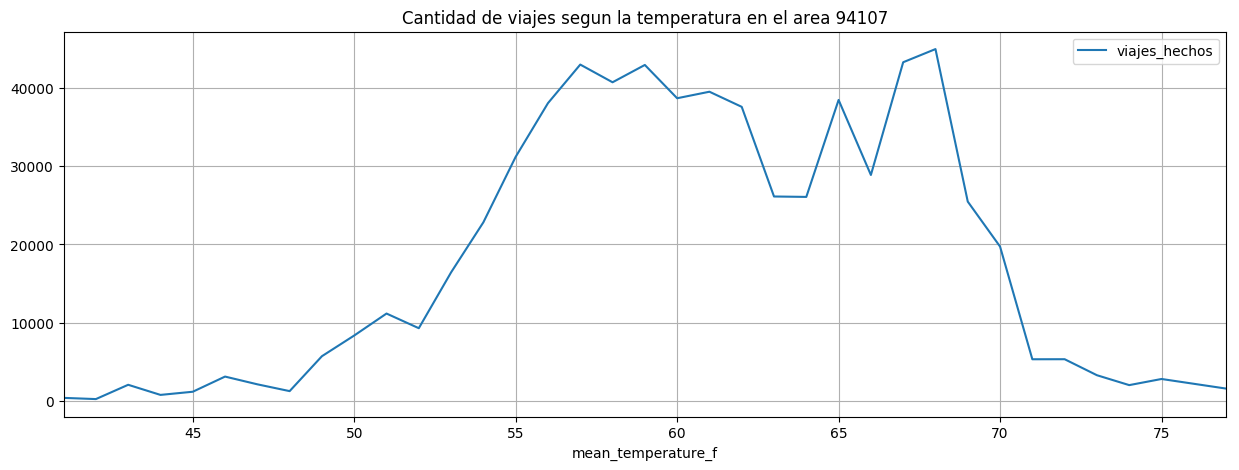

In [67]:
#Podemos observar cómo la mayor cantidad de los viajes se concentran 
viajes_vs_temperatura_en_94107.plot(kind='line',title='Cantidad de viajes segun la temperatura en el area 94107',grid=True)

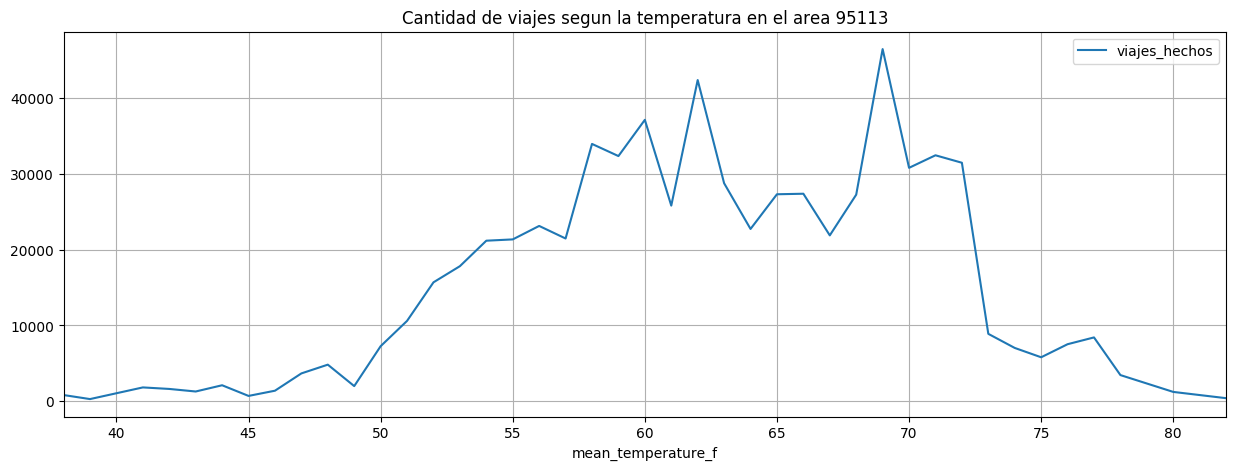

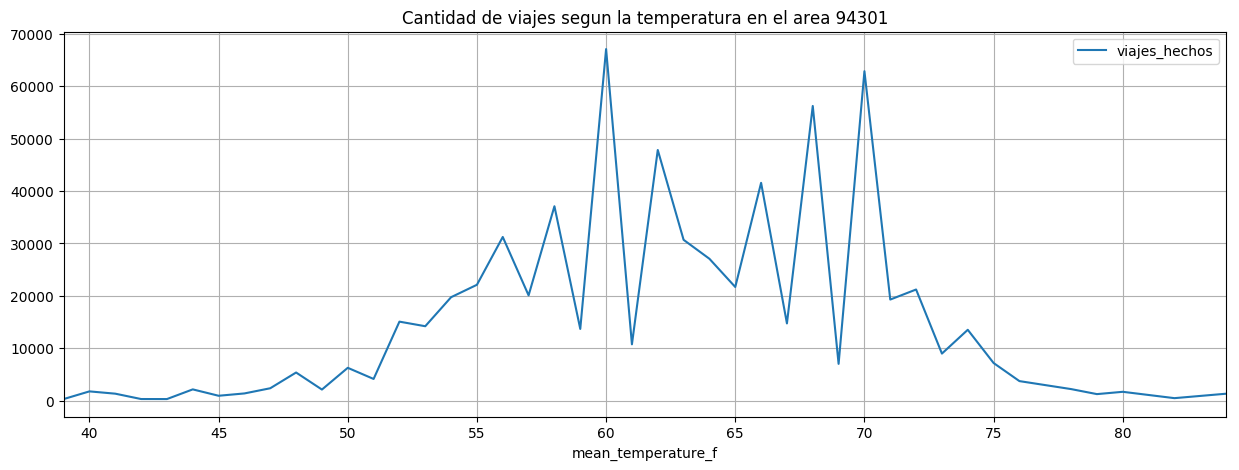

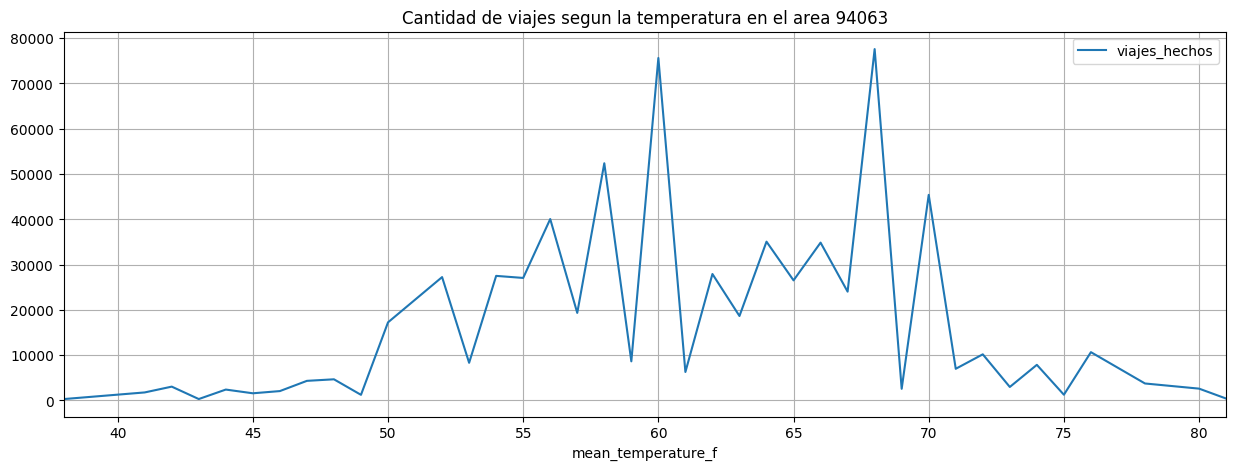

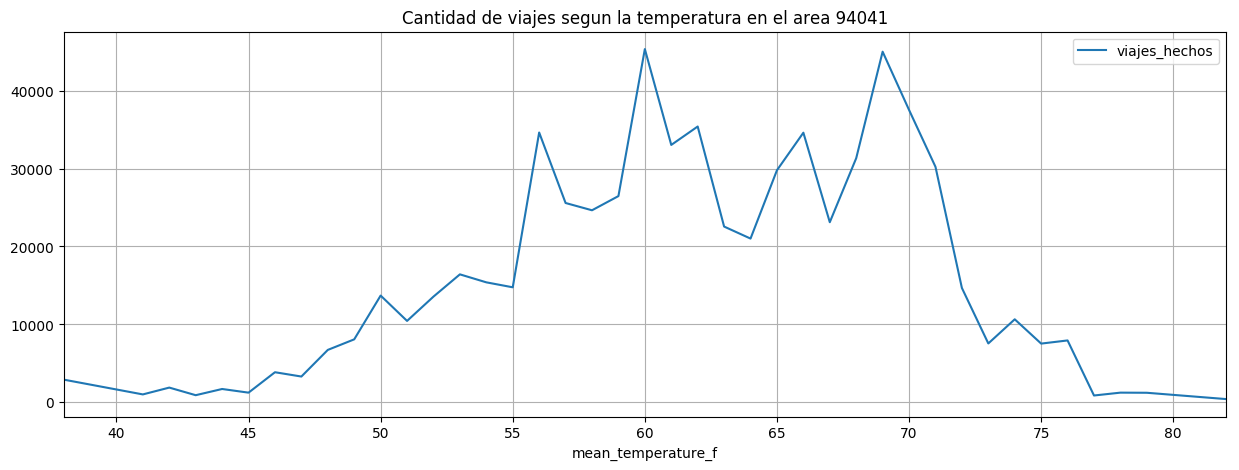

In [68]:
#Repetimos el mismo proceso para el resto de las áreas de SF y observamos si el patrón es similar o, por el contrario, es diferente
viajes_y_temperatura_por_dia_en_95113 = pd.concat([cantidad_viajes_por_dia, clima_fecha_95113.mean_temperature_f], axis=1)
viajes_y_temperatura_por_dia_en_94301 = pd.concat([cantidad_viajes_por_dia, clima_fecha_94301.mean_temperature_f], axis=1)
viajes_y_temperatura_por_dia_en_94063 = pd.concat([cantidad_viajes_por_dia, clima_fecha_94063.mean_temperature_f], axis=1)
viajes_y_temperatura_por_dia_en_94041 = pd.concat([cantidad_viajes_por_dia, clima_fecha_94041.mean_temperature_f], axis=1)

viajes_vs_temperatura_en_95113 = viajes_y_temperatura_por_dia_en_95113.groupby('mean_temperature_f').aggregate(sum)
viajes_vs_temperatura_en_94301 = viajes_y_temperatura_por_dia_en_94301.groupby('mean_temperature_f').aggregate(sum)
viajes_vs_temperatura_en_94063 = viajes_y_temperatura_por_dia_en_94063.groupby('mean_temperature_f').aggregate(sum)
viajes_vs_temperatura_en_94041 = viajes_y_temperatura_por_dia_en_94041.groupby('mean_temperature_f').aggregate(sum)

viajes_vs_temperatura_en_95113.plot(kind='line',title='Cantidad de viajes segun la temperatura en el area 95113',grid=True)
viajes_vs_temperatura_en_94301.plot(kind='line',title='Cantidad de viajes segun la temperatura en el area 94301',grid=True)
viajes_vs_temperatura_en_94063.plot(kind='line',title='Cantidad de viajes segun la temperatura en el area 94063',grid=True)
viajes_vs_temperatura_en_94041.plot(kind='line',title='Cantidad de viajes segun la temperatura en el area 94041',grid=True)

In [80]:
#Veamos la cantidad de viajes segun la hora del dia

hora_viajes = trip.loc[:,['start_date']]
hora_viajes.start_date = hora_viajes.start_date.dt.time
hora_viajes['cantidad_viajes'] = 1
cantidad_viajes_segun_horario = hora_viajes.groupby('start_date').aggregate(sum)




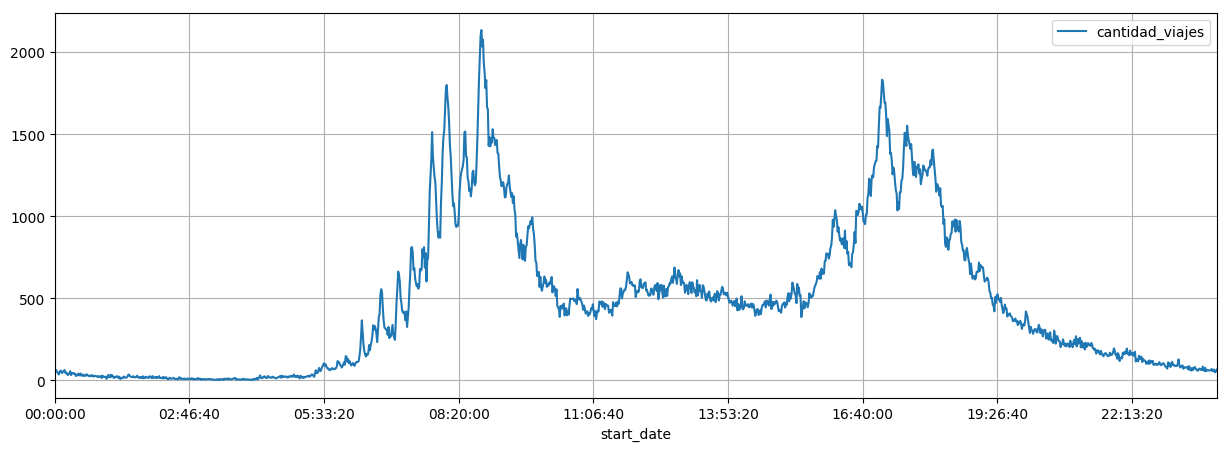

In [83]:
#Como era de esperar, el pico de viajes se da durante la mañana y la tarde, presumiblemente los horarios de salida y regreso al hogar

cantidad_viajes_segun_horario.plot.line(grid=True)

In [ ]:
#Cómo es el movimiento de la estación más popular durante el día? Cuáles son sus horas pico?

#A  = pd.core.frame.DataFrame(columns = ['station_id','bikes_available','docks_available','time'])
#while True:
    #status_partial = status_partial[status_partial.station_id == 70] #70 es el id de san francisco caltrain at 4th
    #A = pd.concat([A,status_partial]) 
    #try:
        #status_partial = status.get_chunk()
    #except StopIteration:
        #break